In [1]:
using Pkg
pkg"activate ."
pkg"instantiate"
pkg"precompile"

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Precompiling project...


In [2]:
] st

Project PerlaTonettiWaugh v0.1.0
    Status `~/Desktop/PerlaTonettiWaugh.jl/Project.toml`
  [6e4b80f9] BenchmarkTools v0.4.1
  [a134a8b2] BlackBoxOptim v0.4.0
  [34da2185] Compat v1.4.0
  [0dc4ae03] DFOLS v0.2.0
  [a93c6f00] DataFrames v0.15.1
  [1313f7d8] DataFramesMeta v0.4.0
  [459566f4] DiffEqCallbacks v2.4.0
  [0c46a032] DifferentialEquations v5.3.1
  [f6369f11] ForwardDiff v0.10.1
  [a98d9a8b] Interpolations v0.11.0
  [0fc2ff8b] LeastSquaresOptim v0.7.1
  [d41bc354] NLSolversBase v7.1.1
  [76087f3c] NLopt v0.5.1
  [d96e819e] Parameters v0.10.2
  [91a5bcdd] Plots v0.22.0
  [438e738f] PyCall v1.18.5
  [1fd47b50] QuadGK v2.0.2
  [c3572dad] Sundials v2.6.0
  [37e2e46d] LinearAlgebra 
  [10745b16] Statistics 


In [3]:
using PerlaTonettiWaugh

#### Vanilla (Old) Experiment 

In [4]:
# Define common objects. 
parameters = parameter_defaults()

settings = settings_defaults()
settings = merge(settings, (transition_penalty_coefficient = 1.0, ))
z_grid = settings.z
M = length(z_grid)

d_T = parameters.d_T
d_0 = d_T + 0.005

params_0 = merge(parameters, (d = d_0,)) # parameters to be used at t = 0
params_T = merge(parameters, (d = d_T,)) # parameters to be used at t = T

# initial value
initial_x = [0.02; 2; .57] # Play with this if it is kicking back errors

# solve for stationary solution at t = 0
stationary_sol_0 = stationary_numerical(params_0, initial_x) # solution at t = 0
stationary_sol_T = stationary_numerical(params_T, initial_x) # solution at t = T

Ω_0 = stationary_sol_0.Ω;
Ω_T = stationary_sol_T.Ω;

In [5]:
settings = merge(settings, (params_T = params_T, stationary_sol_T = stationary_numerical(params_T, z_grid), Ω_0 = Ω_0, transition_iterations = 1000, T = 75.0));

In [6]:
@time settings, result = solve_continuation(d_0, d_T, settings = settings)

┌ Warning: `binary_maxheap(xs::AbstractVector{T}) where T` is deprecated, use `BinaryMaxHeap(xs)` instead.
│   caller = #FunctionCallingCallback#24(::Array{Float64,1}, ::Bool, ::Bool, ::Int64, ::Function, ::Function) at function_caller.jl:75
└ @ DiffEqCallbacks /home/arnavsood/.julia/packages/DiffEqCallbacks/WQXZl/src/function_caller.jl:75
┌ Warning: `binary_maxheap(xs::AbstractVector{T}) where T` is deprecated, use `BinaryMaxHeap(xs)` instead.
│   caller = tstop_saveat_disc_handling at solve.jl:514 [inlined]
└ @ Core /home/arnavsood/.julia/packages/Sundials/AL2Km/src/common_interface/solve.jl:514
┌ Warning: `binary_maxheap(xs::AbstractVector{T}) where T` is deprecated, use `BinaryMaxHeap(xs)` instead.
│   caller = #__init#58(::Bool, ::Nothing, ::Float64, ::Bool, ::Bool, ::DiffEqBase.DiscreteCallback{getfield(DiffEqCallbacks, Symbol("##25#26")),DiffEqCallbacks.FunctionCallingAffect{getfield(PerlaTonettiWaugh, Symbol("#cb_aux#81")){getfield(PerlaTonettiWaugh, Symbol("#Ω#125")){Float64,O

128.164187 seconds (303.03 M allocations: 221.683 GiB, 17.82% gc time)


((z_max = 5, z = [0.0, 0.000250627, 0.000501253, 0.00075188, 0.00100251, 0.00125313, 0.00150376, 0.00175439, 0.00200501, 0.00225564  …  4.63636, 4.67677, 4.71717, 4.75758, 4.79798, 4.83838, 4.87879, 4.91919, 4.9596, 5.0], Δ_E = 1.0e-6, ode_solve_algorithm = Sundials.CVODE_BDF{:Newton,:Dense}(0, 0, 0, 0, false, 10, 5, 7, 3, 10), T = 75.0, t = 0.0:4.444444444444445:40.0, g = [0.0306157, 0.0406157, 0.0506157, 0.0606157, 0.0706157, 0.0806157, 0.0906157, 0.100616, 0.110616, 0.120616], E_node_count = 15, entry_residuals_nodes_count = 15, transition_x0 = [-0.0403739, -0.0482134, -0.0398309, -0.00786403, 0.0348591, -0.129623, -0.0439377, -0.137511, 0.0109955, 0.0515467, -0.00231612, -0.00425251, 5.56582e-5, -0.000159614], fifty_node_iv = [-1.00157, -0.848157, -0.821211, -0.821211, -0.821211, -0.748497, -0.633587, -0.527711, -0.498239, -0.498239  …  -0.0713765, -0.0343871, -0.0334064, -0.0334064, -0.029373, -0.029373, -0.029373, -0.029373, -0.029373, -0.029373], continuation_x0 = [0.0, 0.0, 0.0

In [7]:
result.E_nodes

14-element Array{Float64,1}:
 -0.04037394975704436   
 -0.048213412799167014  
 -0.03983093338786025   
 -0.007864033535436075  
  0.034859145192941726  
 -0.12962252782389352   
 -0.043937697932124056  
 -0.1375108677336115    
  0.010995522209620278  
  0.05154668340180748   
 -0.0023161199355523202 
 -0.0042525146389991945 
  5.5658200029969234e-5 
 -0.00015961417656343096

In [8]:
solved = result.solution;
E_nodes = result.E_nodes;
solved = solved.results;

In [9]:
using Plots

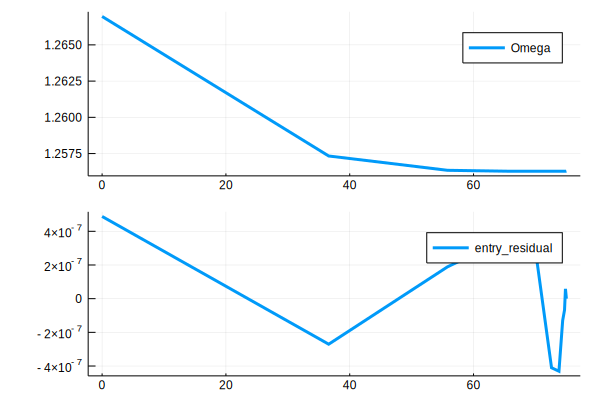

In [10]:
plot_Ω = plot(solved.t, solved.Ω, label = "Omega", lw = 3)
plot_residual = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot_Ω, plot_residual, layout = (2,1))

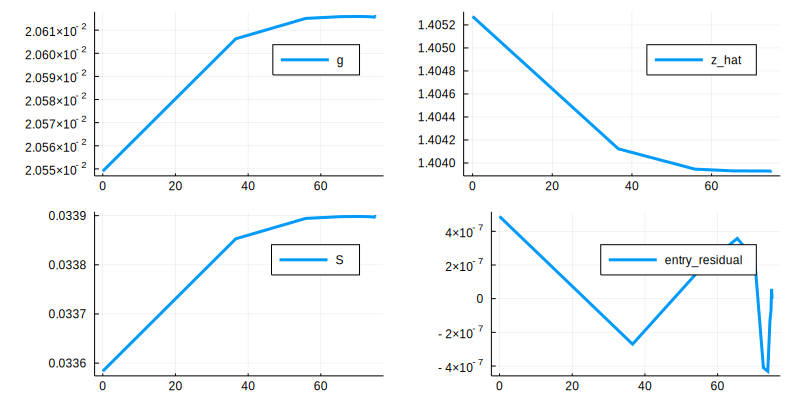

In [11]:
plot1 = plot(solved.t, solved.g, label = "g", lw = 3)
plot2 = plot(solved.t, solved.z_hat, label = "z_hat", lw = 3)
plot3 = plot(solved.t, solved.S, label = "S", lw = 3)
plot4 = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot1, plot2, plot3, plot4, layout=(2,2), size = (800, 400))

#### New Calibration

In [12]:
cal_old_paper = (d = 4.0 , θ = 3.1878, κ = 0.006 , χ = 1.00/2.80, υ = 0.001, σ =3.0, ζ = 1.00, δ = 0.001)
cal = cal_old_paper

# Define common objects. 
parameters = parameter_defaults()

settings = settings_defaults()
settings = merge(settings, (transition_penalty_coefficient = 1.0, ))
z_grid = settings.z
M = length(z_grid)

d_0 = 4.1 # This will get us near autarky.
d_T = cal.d

params_0 = merge(parameters, (d = d_0, θ = cal.θ, κ = cal.κ, χ = cal.χ, υ = cal.υ, σ = cal.σ, ζ = cal.ζ , δ  = cal.δ, )) # parameters to be used at t = 0
params_T = merge(parameters, (d = d_T, θ = cal.θ, κ = cal.κ, χ = cal.χ, υ = cal.υ, σ = cal.σ, ζ = cal.ζ , δ  = cal.δ, )) # parameters to be used at t = T

# initial value
initial_x = [0.02; 2; .57] # Play with this if it is kicking back errors

# solve for stationary solution at t = 0
stationary_sol_atuk = stationary_numerical(params_0, initial_x) # solution at t = 0
stationary_sol = stationary_numerical(params_T, initial_x) # solution at t = T

Ω_0 = stationary_sol_atuk.Ω;
Ω_T = stationary_sol.Ω;

In [13]:
continuation_x0 = transition_x0 = [-0.954599693387771, -0.796617297961165, -0.6520035274409136, -0.562827801831672, -0.3741843672976072, -0.20122165962908825, -0.18898395633321843, -0.10592161148366938, -0.0964005813640459, -0.07711546225956174, -0.04343512879570261, -0.0414551240014235, -0.04109747436876819, -0.01733076740558217]

14-element Array{Float64,1}:
 -0.954599693387771  
 -0.796617297961165  
 -0.6520035274409136 
 -0.562827801831672  
 -0.3741843672976072 
 -0.20122165962908825
 -0.18898395633321843
 -0.10592161148366938
 -0.0964005813640459 
 -0.07711546225956174
 -0.04343512879570261
 -0.0414551240014235 
 -0.04109747436876819
 -0.01733076740558217

In [14]:
@time results, settings = solve_continuation(d_0, d_T, settings = settings, params = params_0)

┌ Warning: `binary_maxheap(xs::AbstractVector{T}) where T` is deprecated, use `BinaryMaxHeap(xs)` instead.
│   caller = #FunctionCallingCallback#24(::Array{Float64,1}, ::Bool, ::Bool, ::Int64, ::Function, ::Function) at function_caller.jl:75
└ @ DiffEqCallbacks /home/arnavsood/.julia/packages/DiffEqCallbacks/WQXZl/src/function_caller.jl:75
┌ Warning: `binary_maxheap(xs::AbstractVector{T}) where T` is deprecated, use `BinaryMaxHeap(xs)` instead.
│   caller = tstop_saveat_disc_handling at solve.jl:514 [inlined]
└ @ Core /home/arnavsood/.julia/packages/Sundials/AL2Km/src/common_interface/solve.jl:514
┌ Warning: `binary_maxheap(xs::AbstractVector{T}) where T` is deprecated, use `BinaryMaxHeap(xs)` instead.
│   caller = #__init#58(::Bool, ::Nothing, ::Float64, ::Bool, ::Bool, ::DiffEqBase.DiscreteCallback{getfield(DiffEqCallbacks, Symbol("##25#26")),DiffEqCallbacks.FunctionCallingAffect{getfield(PerlaTonettiWaugh, Symbol("#cb_aux#81")){getfield(PerlaTonettiWaugh, Symbol("#Ω#125")){Float64,O

1880.149018 seconds (3.35 G allocations: 4.437 TiB, 27.72% gc time)


((z_max = 5, z = [0.0, 0.000250627, 0.000501253, 0.00075188, 0.00100251, 0.00125313, 0.00150376, 0.00175439, 0.00200501, 0.00225564  …  4.63636, 4.67677, 4.71717, 4.75758, 4.79798, 4.83838, 4.87879, 4.91919, 4.9596, 5.0], Δ_E = 1.0e-6, ode_solve_algorithm = Sundials.CVODE_BDF{:Newton,:Dense}(0, 0, 0, 0, false, 10, 5, 7, 3, 10), T = 40.0, t = 0.0:4.444444444444445:40.0, g = [0.0306157, 0.0406157, 0.0506157, 0.0606157, 0.0706157, 0.0806157, 0.0906157, 0.100616, 0.110616, 0.120616], E_node_count = 15, entry_residuals_nodes_count = 15, transition_x0 = [-0.001843, -0.015191, -0.00960838, 0.0450672, -0.0108873, -0.00565096, -0.0263232, 0.0393194, -0.146845, 0.0147425, 0.00120666, -0.00739426, -4.85476e-6, -8.07093e-6], fifty_node_iv = [-1.00157, -0.848157, -0.821211, -0.821211, -0.821211, -0.748497, -0.633587, -0.527711, -0.498239, -0.498239  …  -0.0713765, -0.0343871, -0.0334064, -0.0334064, -0.029373, -0.029373, -0.029373, -0.029373, -0.029373, -0.029373], continuation_x0 = [0.0, 0.0, 0.0,

In [28]:
solved = settings.result # may need to play with this a bit

(:results, :sol, :p, :static_equilibrium)

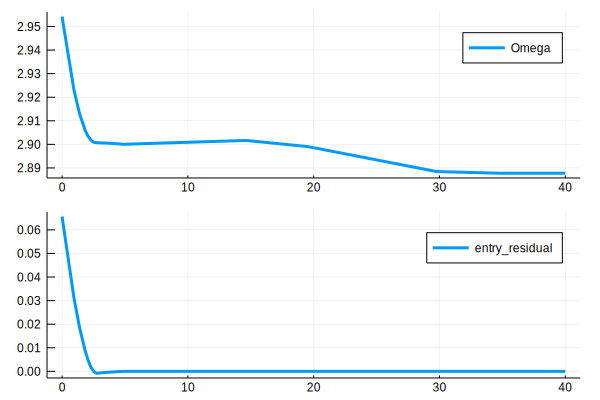

In [32]:
plot_Ω = plot(solved.t, solved.Ω, label = "Omega", lw = 3)
plot_residual = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot_Ω, plot_residual, layout = (2,1))

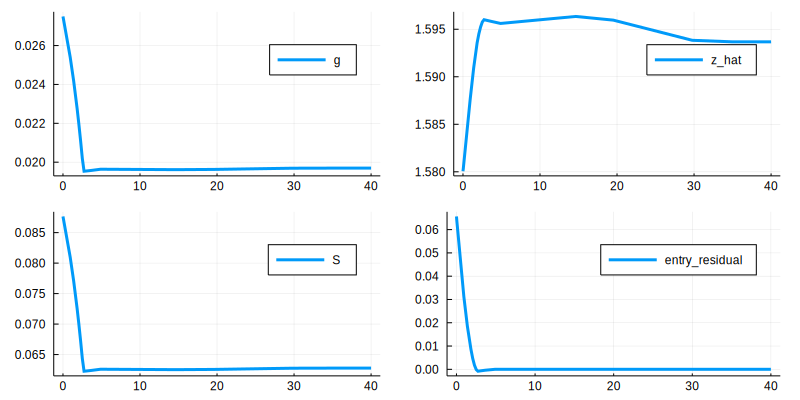

In [33]:
plot1 = plot(solved.t, solved.g, label = "g", lw = 3)
plot2 = plot(solved.t, solved.z_hat, label = "z_hat", lw = 3)
plot3 = plot(solved.t, solved.S, label = "S", lw = 3)
plot4 = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot1, plot2, plot3, plot4, layout=(2,2), size = (800, 400))